In [1]:
import pandas as pd
import numpy as np

import json

np.__version__

'1.19.5'

# Load & prep data

In [2]:
df = pd.read_csv('./data/10-OUTPUT-viz-ready.csv').drop(columns='Unnamed: 0')
df

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,near_neighbors_count
0,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,62.357605,41.475302,25.450,10.0,14
1,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,55.684884,27.032071,25.450,10.0,14
2,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,69.964586,46.613546,25.450,10.0,0
3,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,60.181471,69.527274,25.450,10.0,14
4,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,49.938720,41.965371,25.450,10.0,0
...,...,...,...,...,...,...,...,...,...,...
167355,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,41.610927,50.449968,97.562,20.0,0
167356,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,45.775471,52.982471,97.562,20.0,0
167357,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,45.995316,47.344963,97.562,20.0,5
167358,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,57.715991,46.589529,97.562,20.0,0


# Get gender for performers/groups

In [23]:
import os
import openai
# openai.organization = "personal"
openai.api_key = os.getenv("OPENAI_API_KEY")
# openai.Model.list()

In [26]:
demo_prompt_array = [
'John Lennon',
'Jay-Z Featuring Beyonce Knowles',
'Paul Davis',
'The Everly Brothers',
'Nelson',
'The Dixiebelles',
'LTD',
'Bryan Adams',
"'N Sync",
'B.J. Thomas',
'Nelly',
'The Rolling Stones',
'Cutting Crew',
'Rare Earth',
'The Temptations',
'Miley Cirus',
'Olivia Rodrigo',
'Black Eyed Peas',
]

demo_answer_dict = {
    'John Lennon': 'male', 
    'Jay-Z Featuring Beyonce Knowles': 'mixed', 
    'Paul Davis': 'male',
    'The Everly Brothers': 'male', 
    'Nelson': 'male', 
    'The Dixiebelles': 'female', 
    'LTD': 'male',
    'Bryan Adams': 'male', 
    "'N Sync": "male", 
    'B.J. Thomas': 'male', 
    'Nelly': 'male',
    'The Rolling Stones': 'male', 
    'Cutting Crew': 'male',
    'Rare Earth': 'male',
    'The Temptations': 'male',
    'Miley Cirus': 'female',
    'Olivia Rodrigo': 'female',
    'Black Eyed Peas': 'mixed'
}
demo_answer_array = [
'm', 
'x', 
'm',
'm', 
'm', 
'f', 
'm',
'm', 
"male", 
'm', 
'm',
'm', 
'm',
'm',
'm',
'f',
'f',
'x',
]

In [39]:
GENDER_PROMPT = """
I want to give you a python list of individuals or bands who made it into the Billboard Top 10 Pop hits from 1958-2022, and I want you to respond with a python dictionary where each key is the performer name, and each value is whether the singers from it are "male" (if they're all male), "female" (if all female), or "mixed" (if mixed genders in the band).

Here's an example

['John Lennon', 'Jay-Z Featuring Beyonce Knowles', 'Paul Davis',
       'The Everly Brothers', 'Nelson', 'The Dixiebelles', 'LTD',
       'Bryan Adams', "'N Sync", 'B.J. Thomas', 'Nelly',
       'The Rolling Stones', 'Cutting Crew', 'Rare Earth',
       'The Temptations', 'Miley Cirus', 'Olivia Rodrigo', 'Black Eyed Peas']

You should respond with:

{'John Lennon': 'male','Jay-Z Featuring Beyonce Knowles': 'mixed','Paul Davis': 'male''The Everly Brothers': 'male','Nelson': 'male','The Dixiebelles': 'female','LTD': 'male''Bryan Adams': 'male',"'N Sync": "male",'B.J. Thomas': 'male','Nelly': 'male''The Rolling Stones': 'male','Cutting Crew': 'male''Rare Earth': 'male''The Temptations': 'male''Miley Cirus': 'female''Olivia Rodrigo': 'female''Black Eyed Peas': 'mixed'}

Does that make sense?
"""

# Use GPT to generate Gender for each performer

In [53]:
import ast
ast.literal_eval("['Michael Jackson']")

['Michael Jackson']

In [69]:
def get_gender_for_performers(performers):
    try: 
        completion = openai.ChatCompletion.create(
          model="gpt-3.5-turbo-0301",
          messages=[
            {"role": "user", "content": GENDER_PROMPT},
            {"role": "user", "content": str(performers)},
          ]
        )
        return ast.literal_eval(completion.choices[0].message['content'])
    except:
        print('ERROR FETCHING')
        return {}

res = get_gender_for_performers(['Michael Jackson'])

In [70]:
# INCREMENT = 60

# unique_performers = df.performer.unique()#[0:120]

# gender_dictionary = {}

# for i in range(42):
#     subset = unique_performers[i*INCREMENT : (i+1)*INCREMENT]
#     if subset.any():
#         print([i*INCREMENT, (i+1)*INCREMENT])
#         print(subset, '\n')
#         res = get_gender_for_performers(subset)
#         gender_dictionary = {**gender_dictionary, **res}
        

[0, 60]
['John Lennon' 'Jay-Z Featuring Beyonce Knowles' 'Paul Davis'
 'The Everly Brothers' 'Nelson' 'The Dixiebelles' 'LTD' 'Bryan Adams'
 "'N Sync" 'B.J. Thomas' 'Nelly' 'The Rolling Stones' 'Cutting Crew'
 'Rare Earth' 'The Temptations' 'Bill Medley & Jennifer Warnes'
 'Luther Ingram' 'Ronnie Dyson' 'Paula Abdul' 'The Reflections'
 'The Human League' 'The 5th Dimension' 'Andy Gibb' 'Elvis Presley'
 'Elvis Presley With The Jordanaires' 'Paul Evans and the Curls'
 'KC And The Sunshine Band' 'Otis Redding' 'Aretha Franklin' 'Gene Pitney'
 'Dionne Warwick' 'Ronnie Milsap' 'Carpenters' 'Blues Magoos'
 'Sean Paul Featuring Keyshia Cole' 'Andy Williams' 'Britney Spears'
 'Beastie Boys' 'The Righteous Brothers' 'Paul Anka with Odia Coates'
 'Jackie Wilson' 'Chicago' 'Stray Cats' 'Rita Coolidge' 'Taylor Swift'
 'Amerie' 'Ciara Featuring Missy Elliott' 'Coolio' '1910 Fruitgum Co.'
 'Gloria Estefan & Miami Sound Machine' 'Len Barry'
 'Logic Featuring Alessia Cara & Khalid' 'Dan + Shay & Justi

[480, 540]
['Ray Charles and his Orchestra' 'Clarence Henry' 'BTS' 'Crazy Town'
 'The Pussycat Dolls Featuring Snoop Dogg' 'T-Pain Featuring Yung Joc'
 'B*Witched' 'Robbie Nevil' 'D-Mob Introducing Cathy Dennis'
 'Bobby Freeman' 'The 4 Seasons Featuring the "Sound of Frankie Valli"'
 "Quad City DJ's" 'DNCE' 'Lawrence Welk And His Orchestra' 'Lil Baby'
 'The Mamas & The Papas' 'David Lee Roth'
 'Katy Perry Featuring Snoop Dogg' 'The Rivieras' 'Al Green'
 'Carly Rae Jepsen' 'Evanescence' 'Blondie' 'Lil Tjay Featuring 6LACK'
 'Tyrone Davis' 'Tevin Campbell' 'T-Pain Featuring Lil Wayne'
 'REO Speedwagon' 'Barry White' 'Bad Company' 'Electric Light Orchestra'
 'Kylie Minogue' 'UB40' "Fabolous Featuring Mike Shorey & Lil' Mo"
 'Puff Daddy (Featuring Mase)' 'Barry Manilow' 'Justin Timberlake'
 'After 7' 'Frankie Valli' 'Dan Hill (Duet With Vonda Shepard)' 'Dawn'
 'Soul For Real' '50 Cent Featuring Olivia' 'US3' 'Rose Royce'
 'Jay & The Americans' 'Gordon Lightfoot' 'Wham! Featuring George Mic

[900, 960]
['Ruben Studdard' 'Kanye West' 'Uncle Kracker' 'Gin Blossoms'
 'Elvin Bishop' 'Debbie Gibson' 'Jewel' 'Ashanti' 'Steve Lawrence'
 'Pop Smoke Featuring Lil Baby & DaBaby' 'The Buffalo Springfield'
 'Rick Nelson' 'Sheena Easton' 'The Yardbirds' 'Luke Combs'
 'Drake Featuring Kanye West, Lil Wayne & Eminem'
 'Lil Baby Featuring Fridayy' 'The Little Dippers' 'Bobby Rydell'
 'Maxwell' 'Rihanna & Kanye West & Paul McCartney'
 'Travis Scott Featuring Young Thug & M.I.A.' 'Adina Howard' 'Silk'
 'Lil Dicky Featuring Chris Brown' 'Curtis Mayfield' 'Tom Petty'
 'Petey Pablo' 'Carl Anderson & Gloria Loring'
 'Jody Watley With Eric B. & Rakim' 'Ned Miller' 'Shania Twain'
 'Pharrell Featuring Jay-Z' 'Da Brat' 'Wilson Pickett' 'Tone-Loc'
 'Lipps, Inc.' 'Pseudo Echo' 'Donna Fargo'
 'Flo Rida Featuring Sage The Gemini & Lookas' 'Changing Faces'
 'Ronny And The Daytonas' 'Glen Campbell'
 'Wayne Fontana & The Mindbenders' 'PSY' 'DRS' 'Eve Featuring Alicia Keys'
 'Coolio Featuring L.V.' 'Rick N

[1320, 1380]
['Yvonne Elliman' 'Trini Lopez' 'Sweet Sensation'
 'Harold Melvin And The Blue Notes' 'Jon Secada' 'Jennifer Lopez'
 'Orchestral Manoeuvres In The Dark' 'Brownstone' 'Jimmy Soul'
 "Safaris with The Phantom's Band" 'Atlanta Rhythm Section'
 'John Lennon Plastic Ono Band' 'Dru Hill' 'Jason Derulo'
 'Mary Jane Girls' 'Anita Bryant' 'Flo Rida Featuring will.i.am'
 'Drake Featuring Lil Durk & Giveon' 'Linkin Park' 'Ernie Fields & Orch.'
 'Village People' 'The Dramatics' 'Mungo Jerry' 'Zager & Evans'
 'Strawberry Alarm Clock' 'Sisqo'
 "Webbie Featuring Lil' Phat & Lil' Boosie" 'The Raiders' 'R. Dean Taylor'
 'Lil Nas X & Jack Harlow' 'Snow' 'Bo Bice' 'John Ono Lennon'
 'Justin Bieber Featuring Quavo' 'Fabolous Featuring Tamia Or Ashanti'
 'Goo Goo Dolls' 'Alanis Morissette' 'Kenny Rogers Duet With Dolly Parton'
 'Desmond Dekker & The Aces' 'Kygo x Selena Gomez' 'Sonique'
 'Johnny Tillotson' 'Vikki Carr' 'Albert Hammond' 'Tavares'
 'Shaggy Featuring Ricardo "RikRok" Ducent' 'Bonn

[1740, 1800]
['Lloyd Banks' 'Patti LaBelle & Michael McDonald'
 'John Cafferty & The Beaver Brown Band'
 'Jennifer Lopez Featuring Pitbull' 'Great White'
 'Rufus Featuring Chaka Khan' 'Chingy Featuring J. Weav'
 'Drake Featuring WizKid & Kyla' 'Larry Graham' 'Timmy T.' 'Murray Head'
 'Joan Osborne' 'Post Malone & The Weeknd' 'Mariah Carey & Boyz II Men'
 'The Fixx' 'Brewer And Shipley' 'Bobby Lewis' 'Barenaked Ladies'
 'Dr. Hook' 'The Motels' 'Enya' 'Perfect Gentlemen' 'Tweet'
 'Paula Abdul (Duet With The Wild Pair)' 'Ruby And The Romantics'
 'Madness' '50 Cent Featuring Mobb Deep' 'Nelly Featuring Tim McGraw'
 'Twista' 'Yes' 'Rhythm Syndicate' 'Buckner & Garcia'
 'Drake Featuring Playboi Carti' 'Freddy Cannon' 'Desiigner' 'M.I.A.'
 'Marie Osmond' 'Finger Eleven' 'The Chainsmokers' 'Eddie Murphy'
 'Claudine Clark' 'Shop Boyz' 'LMFAO Featuring Lauren Bennett & GoonRock'
 'Musical Youth' 'Clarence Carter' 'Dickey Lee'
 'Perez Prado And His Orchestra' 'Maroon 5 Featuring Wiz Khalifa'
 'Ju

[2160, 2220]
['Glenn Frey' 'Van McCoy And The Soul City Symphony' 'The Larks'
 'Chris de Burgh' 'Joe Cocker with Leon Russell & The Shelter People'
 'The Tokens' 'Little Eva' 'Sister Janet Mead' 'Aloe Blacc' 'Mike Douglas'
 'Jimmy Eat World' 'Zedd, Maren Morris & Grey' 'Major Lance'
 'Maureen McGovern' 'Charlie Rich' 'Dick and DeeDee'
 'Peter Cetera With Amy Grant' 'Paper Lace' 'Vicki Lawrence' 'Joan Baez'
 'The Browns Featuring Jim Edward Brown' 'John Fogerty' 'Chesney Hawkes'
 'Crispian St. Peters' "Oran 'Juice' Jones" 'The Jaggerz' 'Hoobastank'
 'Men Without Hats' 'THE SCOTTS, Travis Scott & Kid Cudi' 'Shalamar'
 'Betty Everett' 'Lupe Fiasco' 'David Rose and His Orchestra'
 'Gwen Stefani Featuring Akon' 'The Browns' 'David Cook'
 'The Irish Rovers' 'Scandal Featuring Patty Smyth'
 'Timbaland Featuring Keri Hilson' 'OutKast Featuring Sleepy Brown'
 'Ariana Grande Featuring Mac Miller' 'Julie Rogers' 'Teddy Pendergrass'
 'Joey Scarbury' 'Richard Chamberlain' 'Isaac Hayes'
 'Dionne War

In [77]:
TO_BE_SAFE = gender_dictionary

In [72]:
len(gender_dictionary.keys())

1607

In [75]:
'Ariana Grande' in gender_dictionary

True

In [86]:
still_missing_performers = [p for p in unique_performers if p not in gender_dictionary]
len(still_missing_performers)

860

In [87]:
# INCREMENT = 50

# REDO_gender_dictionary = {}

# for i in range(42):
#     subset = still_missing_performers[i*INCREMENT : (i+1)*INCREMENT]
#     if len(subset):
#         print([i*INCREMENT, (i+1)*INCREMENT])
#         print(subset, '\n')
#         res = get_gender_for_performers(subset)
#         REDO_gender_dictionary = {**REDO_gender_dictionary, **res}
        

[0, 50]
['Lil Wayne', 'Milli Vanilli', 'O-Town', 'Air Supply', 'Free', 'Don Henley', 'Smash Mouth', 'Ace Of Base', 'Whitney Houston', 'Blink-182', 'Kendrick Lamar & SZA', 'Sting', 'Tiffany', 'George Harrison', 'Cyndi Lauper', 'Michelle Branch', 'Bent Fabric and His Piano', 'Hollywood Argyles', 'Mike Reno And Ann Wilson', "Gilbert O'Sullivan", 'The Coasters', 'The Association', 'Prince', 'Deodato', 'David Seville And The Chipmunks', 'Pet Shop Boys', 'Willie Nelson', 'Ja Rule Featuring Ashanti', 'Naked Eyes', 'Atlantic Starr', 'Bon Jovi', 'Nico & Vinz', 'Boston', 'Lonestar', 'The Impressions', 'Neil Diamond', 'Estelle Featuring Kanye West', 'Don McLean', 'The Guess Who', 'Byron MacGregor', 'Connie Francis', 'Jerry Reed', 'Three Dog Night', 'Victor Lundberg', 'Nicki Minaj', 'Blood, Sweat & Tears', 'Rosie And The Originals', 'The Jeff Healey Band', 'Hot', 'Monica'] 

[50, 100]
['Juice Newton', 'Merrilee Rush & The Turnabouts', 'Aerosmith', 'Madonna', 'Shaggy Featuring Rayvon', 'Richard Mar

[450, 500]
['Kevin Rudolf Featuring Lil Wayne', 'Dazz Band', 'Eve Featuring Gwen Stefani', 'Bow Wow Featuring Omarion', 'The Sensations', 'Pure Prairie League', 'DJ Snake Featuring Justin Bieber', 'Pete Townshend', 'Billy Bland', 'Shannon', 'Bellamy Brothers', 'Chris Montez', 'Hayley Mills and Hayley Mills', 'Sly Fox', 'Trick Daddy Featuring Lil Jon & Twista', 'The Grass Roots', 'Montell Jordan Feat. Master P & Silkk The Shocker', 'Bob Luman', 'Chubby Checker', 'Dua Lipa Featuring DaBaby', 'The Dream Academy', 'Rascal Flatts', 'Tom Cochrane', 'Reunion', 'Future Featuring Drake', 'Juice WRLD X Halsey', 'Bad Meets Evil Featuring Bruno Mars', 'Ellie Goulding', 'Ciara Featuring Justin Timberlake', 'The B-52s', 'Sara Bareilles', 'Tesla', 'The Cure', 'Eminem Featuring Rihanna', 'Henry Mancini And His Orchestra', 'Pablo Cruise', 'Major Harris', 'Ready For The World', 'Ron Holden with The Thunderbirds', 'Martika', 'Teena Marie', 'Mariah Carey Featuring Cameo', 'Lil Jon & The East Side Boyz Fea

ERROR FETCHING
[800, 850]
['The Five Americans', 'Dinah Washington', 'Pet Shop Boys & Dusty Springfield', 'Edie Brickell & New Bohemians', 'The Tams', 'Maroon 5 Featuring SZA', 'High School Musical 2 Cast', 'City High', 'Pop Smoke', 'Mase Featuring Total', 'Bobby Caldwell', 'Busta Rhymes Featuring Janet', 'Nick Lachey', 'Fat Joe Featuring Ashanti', 'Rihanna Featuring Drake', 'Don & Juan', 'Adam Lambert', 'John Lennon With The Plastic Ono Nuclear Band', 'Jack Harlow Featuring DaBaby, Tory Lanez & Lil Wayne', 'Salt-N-Pepa Featuring En Vogue', 'The String-A-Longs', 'Percy Sledge', 'Sheriff', 'Five', 'The Dreamlovers', 'The Three Degrees', 'Kalin Twins', 'Skrillex & Diplo With Justin Bieber', 'Jimmy Harnen With Synch', 'No Mercy', 'Paula Cole', 'Roberta Flack & Donny Hathaway', 'Jagged Edge With Nelly', 'Fort Minor Featuring Holly Brook', 'The Calling', 'The Poppy Family (Featuring Susan Jacks)', '"Weird Al" Yankovic', 'Danny Williams', 'JT Money Featuring Sole', 'Barry Mann', 'El DeBarge'

In [88]:
still_missing_performers2 = [p for p in unique_performers if p not in {**gender_dictionary, **REDO_gender_dictionary}]
len(still_missing_performers2)

200

In [94]:
# INCREMENT = 50

# RE_REDO_gender_dictionary = {}

# for i in range(42):
#     subset = still_missing_performers2[i*INCREMENT : (i+1)*INCREMENT]
#     if len(subset):
#         print([i*INCREMENT, (i+1)*INCREMENT])
#         print(subset, '\n')
#         res = get_gender_for_performers(subset)
#         RE_REDO_gender_dictionary = {**RE_REDO_gender_dictionary, **res}
        

[0, 50]
['Juice Newton', 'Merrilee Rush & The Turnabouts', 'Aerosmith', 'Madonna', 'Shaggy Featuring Rayvon', 'Richard Marx', 'Maroon 5', 'Tony Toni Tone', 'Pink Floyd', 'Paul McCartney', 'Real McCoy', 'Justin Bieber Featuring Ludacris', 'Ke$ha', 'Bruce Springsteen', 'Steppenwolf', 'Poni-Tails', 'Judy Collins', 'The Fireballs', 'Trey Songz Featuring Nicki Minaj', 'Green Day', 'Big Sean', 'The Manhattan Transfer', 'BTS Featuring Halsey', 'Ariana Grande & Social House', 'Melanie', 'Looking Glass', 'The Newbeats', 'Ariana Grande Featuring Zedd', 'Rihanna & Sean Paul', 'Beyonce', 'Matthew Wilder', 'The Stylistics', 'Taio Cruz Featuring Ludacris', 'Irene Cara', 'Deep Blue Something', 'Mint Condition', 'Ollie And Jerry', 'Zac Efron, Andrew Seeley & Vanessa Anne Hudgens', 'Swing Out Sister', 'Fabolous', 'Faith Hill', 'Commodores', 'Simon & Garfunkel', 'Evanescence Featuring Paul McCoy', 'The Dovells', 'D.R.A.M. Featuring Lil Yachty', 'Mr. Mister', 'Sarah Vaughan', 'Stories', 'Van Morrison'] 


In [4]:
# [p for p in unique_performers if p not in {
#     **gender_dictionary, **REDO_gender_dictionary, **RE_REDO_gender_dictionary
# }]

In [5]:
# GIANT_DICT_OF_ALL_GPT_GENDER_DATA = {
#     **gender_dictionary, **REDO_gender_dictionary, **RE_REDO_gender_dictionary
# }

# with open('./data/GIANT_DICT_OF_ALL_GPT_GENDER_DATA.pkl', 'wb') as fp:
#     pickle.dump(GIANT_DICT_OF_ALL_GPT_GENDER_DATA, fp)

# len(GIANT_DICT_OF_ALL_GPT_GENDER_DATA.keys())

## Intervention: redo anything makred as "mixed" by GPT3.5 in GPT4 ... by hand cuz the API isn't available yet... *sigh*

In [10]:
gender_df = pd.read_csv('./data/11-OUTPUT-with-imperfect-gpt-gender-col.csv')
gender_df

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,near_neighbors_count,gender
0,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,62.357605,41.475302,25.450,10.0,14,m
1,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,55.684884,27.032071,25.450,10.0,14,m
2,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,69.964586,46.613546,25.450,10.0,0,m
3,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,60.181471,69.527274,25.450,10.0,14,m
4,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,49.938720,41.965371,25.450,10.0,0,m
...,...,...,...,...,...,...,...,...,...,...,...
167355,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,41.610927,50.449968,97.562,20.0,0,x
167356,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,45.775471,52.982471,97.562,20.0,0,x
167357,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,45.995316,47.344963,97.562,20.0,5,x
167358,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,57.715991,46.589529,97.562,20.0,0,x


In [18]:
artists_labled_as_mixed = gender_df[
    gender_df.gender == 'x'
].performer.unique()

artists_labled_as_mixed

array(['Jay-Z Featuring Beyonce Knowles', 'LTD', 'Cutting Crew', ...,
       'KYLE Featuring Lil Yachty', 'J. Cole, 21 Savage & Morray',
       'J. Cole & Lil Baby'], dtype=object)

In [19]:
INCREMENT = 60

for i in range(42):
    subset = artists_labled_as_mixed[i*INCREMENT : (i+1)*INCREMENT]
    if subset.any():
        print([i*INCREMENT, (i+1)*INCREMENT])
        print(subset, '\n')

[0, 60]
['Jay-Z Featuring Beyonce Knowles' 'LTD' 'Cutting Crew' 'Rare Earth'
 'Bill Medley & Jennifer Warnes' 'The Human League' 'The 5th Dimension'
 'KC And The Sunshine Band' 'Carpenters'
 'Sean Paul Featuring Keyshia Cole' 'Beastie Boys'
 'Paul Anka with Odia Coates' 'Chicago' 'Stray Cats'
 'Ciara Featuring Missy Elliott' '1910 Fruitgum Co.'
 'Gloria Estefan & Miami Sound Machine'
 'Logic Featuring Alessia Cara & Khalid' 'Dan + Shay & Justin Bieber'
 'Skid Row' 'The KLF' 'Ariana Grande Feat. Doja Cat & Megan Thee Stallion'
 'Madonna Featuring Justin Timberlake & Timbaland'
 'T-Pain Featuring Wiz Khalifa & Lily Allen' 'Lukas Graham'
 'Prince And The New Power Generation' 'Blaque' 'Tommy Tutone'
 '? (Question Mark) & The Mysterians' 'The Rascals' 'Sonny & Cher'
 'The Young Rascals' 'The Mindbenders' 'The Beatles' 'America'
 'The Monkees' 'The Toys' 'Jimmy Charles and The Revelletts'
 "Herman's Hermits" 'Dinah Washington & Brook Benton' 'Coldplay'
 'Chad & Jeremy' 'Kathy Young With The

## ... now correct with the GPT4 data: GPT4_UPDATED_MIXED

In [45]:
TO_NUM_CONVERSION = {
    'mixed': 'x',
    'female': 'f',
    'male': 'm',
    'unknown': 'x'
}

In [46]:
def swap_in_new_gender_if_any(row):
    new_gender = row['performer'] in GPT4_UPDATED_MIXED
    if new_gender:
        g = GPT4_UPDATED_MIXED[row['performer']]
#         print('HIT')
        return TO_NUM_CONVERSION[g]
    else:
        return row.gender

updated_gender_col = gender_df.apply(swap_in_new_gender_if_any, axis=1)

In [48]:
updated_gender_df = gender_df.copy()
updated_gender_df['gender'] = updated_gender_col
updated_gender_df

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,near_neighbors_count,gender
0,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,62.357605,41.475302,25.450,10.0,14,m
1,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,55.684884,27.032071,25.450,10.0,14,m
2,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,69.964586,46.613546,25.450,10.0,0,m
3,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,60.181471,69.527274,25.450,10.0,14,m
4,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,49.938720,41.965371,25.450,10.0,0,m
...,...,...,...,...,...,...,...,...,...,...,...
167355,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,41.610927,50.449968,97.562,20.0,0,m
167356,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,45.775471,52.982471,97.562,20.0,0,m
167357,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,45.995316,47.344963,97.562,20.0,5,m
167358,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,57.715991,46.589529,97.562,20.0,0,m


In [61]:
len(updated_gender_df[
    updated_gender_df.gender == 'm'
].performer.unique())

1616

In [62]:
updated_gender_df.to_csv('./data/11-OUTPUT-with-gender-from-gpt4.csv', index=False)

## Merge gender data into data frame

In [52]:
# gender_col = df.apply(lambda row: GIANT_DICT_OF_ALL_GPT_GENDER_DATA[row.performer], axis=1)

In [53]:

# gender_num_col = [TO_NUM_CONVERSION[g] for g in gender_col]

In [54]:
# TO_NUM_CONVERSION[gender_col[2]]

In [55]:
# with_gendre_df = df.copy()
# with_gendre_df['gender'] = gender_num_col
# with_gendre_df

In [56]:
# with_gendre_df.to_csv('./data/11-OUTPUT-with-imperfect-gpt-gender-col.csv', index=False)

In [57]:
# with_gendre_df['gender'].unique()

In [58]:
# with_gendre

In [59]:
# _stuff = with_gendre_df[
#     with_gendre_df.gender == 'x'
# ].performer.unique()

# len(list(_stuff))
# list(_stuff)

# Look at popularity over time

In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [85]:
ENTIRE_CHART_BBOX = {"x":[-2.862627270141111,126.29481148663372],"y":[12.152482533476716,85.38013754289815]}
def viz_bbox(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term=''):
    filtered_to_bbox = viz_ready[
        (viz_ready.x > bbox['x'][0]) &
        (viz_ready.x < bbox['x'][1]) &

        (viz_ready.y > bbox['y'][0]) &
        (viz_ready.y < bbox['y'][1])
    ]
    if filter_term:
        filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.lyric_line.str.contains(filter_term, case=False)]
    male = filtered_to_bbox[filtered_to_bbox.gender == 'm']
    female = filtered_to_bbox[filtered_to_bbox.gender == 'f']
    mixed = filtered_to_bbox[filtered_to_bbox.gender == 'x']
    sns.distplot(male.chart_debut_date_normalized_0_to_1, bins=45, color='blue')
    sns.distplot(female.chart_debut_date_normalized_0_to_1, bins=45, color='pink')
    plt.gca().set_xlim([0, 100])

    plt.show()

/Users/dmora/.virtualenvs/jupyter3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dmora/.virtualenvs/jupyter3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


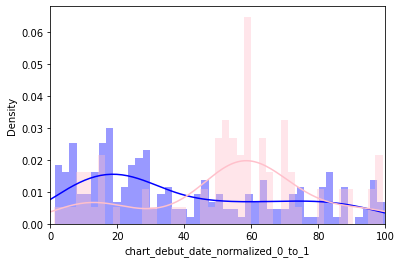

In [93]:

# unclear if any change
endearments = {"x":[68.41437686488501,70.60785278424815],"y":[37.41337593941116,38.656998447264364]}
hope = {"x":[63.82054821612978,64.7455660983335],"y":[34.10020481305155,34.62465691590811]}
king_and_queen = {"x":[37.16232335742171,39.00723683780778],"y":[47.32136770032542,48.36736775393717]}
this_topic_does_not_matter = {"x":[69.40281662040354,70.7281775003339],"y":[55.34667073773606,56.09810302233943]}

# increases
money = {"x":[44.373966474543344,46.89578417179803],"y":[51.32652039574649,53.620313395218965]}
bling = {"x":[36.830222358561755,38.98558104895179],"y":[50.51323309248308,52.473702590635526]}


# decrease
trains = {"x":[33.81003871731829,35.12548575198946],"y":[44.21206344977864,44.95787493818595]}
mail_letters = {"x":[75.49889146108401,78.36359380070401],"y":[51.102477133812194,52.72666104957888]}
crying = {"x":[47.221939675414774,51.22855843986578],"y":[63.95499696143897,66.2266067073554]}
smooching = {"x":[42.29274375515004,46.38922509120185],"y":[58.50912291912832,60.83168153376482]}

# flashes
the_twist = {"x":[43.44424212685903,45.81103037181394],"y":[27.42601396768172,29.578795397291564]}


# peaks
apology = {"x":[74.22341143872275,76.60246085972018],"y":[54.42211974817969,55.770955803834475]}
lonesomeness = {"x":[46.83177410717391,51.25894554602522],"y":[60.27980592534157,62.78985401790457]}
summer = {"x":[38.33223185597551,39.937022657569045],"y":[56.732321042928035,57.64218011347436]}
heart_and_soul = {"x":[51.29575376990074,54.630406727410495],"y":[63.39077685082963,66.42390792050726]}
heaven = {"x":[41.952352805865246,44.28253666093067],"y":[62.549830960924254,64.66931779776084]}
freedom = {"x":[48.863729693018406,50.7200475836808],"y":[57.927640223430984,59.61610842120449]} # sudden drop
american_south = {"x":[40.30689751115798,41.25062601956011],"y":[40.768192046759836,41.626587896837336]} # has gap
love_lagoon = {"x":[56.88552518777873,67.59223863239565],"y":[57.13397513383038,66.87257930547837]}


viz_bbox(updated_gender_df, endearments)

### Region & word filter

/Users/dmora/.virtualenvs/jupyter3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dmora/.virtualenvs/jupyter3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


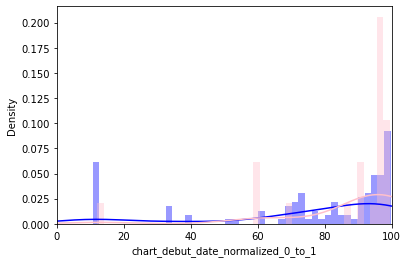

In [90]:
bad_bitch = 'bad bitch'
meow = 'pussy'
viz_bbox(updated_gender_df, filter_term=meow)

# La dee da...

# ... de la dee!

In [27]:
GPT4_UPDATED_MIXED = {
    
    'Jay-Z Featuring Beyonce Knowles': 'mixed', 
    'LTD': 'male',
    'Cutting Crew': 'male',
    'Rare Earth': 'male',
    'Bill Medley & Jennifer Warnes': 'mixed',
    'The Human League': 'mixed', 
    'The 5th Dimension': 'mixed',
    'KC And The Sunshine Band': 'mixed',
    'Carpenters': 'mixed',
    'Sean Paul Featuring Keyshia Cole': 'mixed', 
    'Beastie Boys': 'male', 
    'Paul Anka with Odia Coates': 'mixed',
    'Chicago': 'male', 
    'Stray Cats': 'male', 
    'Ciara Featuring Missy Elliott': 'mixed', 
    '1910 Fruitgum Co.': 'male',
    'Gloria Estefan & Miami Sound Machine': 'mixed', 
    'Logic Featuring Alessia Cara & Khalid': 'mixed', 
    'Dan + Shay & Justin Bieber': 'mixed',
    'Skid Row': 'male', 
    'The KLF': 'male', 
    'Ariana Grande Feat. Doja Cat & Megan Thee Stallion': 'female',
    'Madonna Featuring Justin Timberlake & Timbaland': 'mixed',
    'T-Pain Featuring Wiz Khalifa & Lily Allen': 'mixed', 
    'Lukas Graham': 'male',
    'Prince And The New Power Generation': 'male', 
    'Blaque': 'female', 
    'Tommy Tutone': 'male',
    '? (Question Mark) & The Mysterians': 'male', 
    'The Rascals': 'male', 
    'Sonny & Cher': 'mixed',
    'The Young Rascals': 'male', 
    'The Mindbenders': 'male', 
    'The Beatles': 'male', 
    'America': 'male',
    'The Monkees': 'male', 
    'The Toys': 'female', 
    'Jimmy Charles and The Revelletts': 'male',
    "Herman's Hermits": 'male', 
    'Dinah Washington & Brook Benton': 'mixed', 
    'Coldplay': 'male',
    'Chad & Jeremy': 'male', 
    'Kathy Young With The Innocents': 'mixed', 
    'Duran Duran': 'male',
    'Procol Harum': 'male', 
    'Peabo Bryson & Regina Belle': 'mixed', 
    'Ray Parker Jr. & Raydio': 'mixed',
    'Peter And Gordon': 'male', 
    'Jackson 5': 'male', 
    'The Steve Miller Band': 'male', 
    'Nine Days': 'male',
    'Daryl Hall John Oates': 'male', 
    'Toto': 'male', 
    'Cher & Peter Cetera': 'mixed', 
    'Earth, Wind & Fire': 'male',
    'Starland Vocal Band': 'mixed', 
    'TLC': 'female', 
    'Paramore': 'female', 
    'Jennifer Lopez Featuring Ja Rule': 'mixed', 
    'Marvin Gaye & Tammi Terrell': 'mixed',
    'B.o.B Featuring Hayley Williams': 'mixed', 
    'Simple Minds': 'male', 
    'Allure Featuring 112': 'mixed', 
    'Lisa Lisa And Cult Jam With Full Force Featuring Paul Anthony & Bow Legged Lou': 'mixed',
    'The Kinks': 'male', 
    'Kanye West Featuring Syleena Johnson': 'mixed', 
    'Bryan Adams/Rod Stewart/Sting': 'male', 
    'Jennifer Lopez Featuring LL Cool J': 'mixed',
    'Mike + The Mechanics': 'male', 
    'Heart': 'female', 
    'K-Ci & JoJo': 'male', 
    'Faith Evans Featuring Puff Daddy': 'mixed', 
    'Milli Vanilli': 'male', 
    'O-Town': 'male', 
    'Air Supply': 'male',
    'Free': 'male', 
    'Smash Mouth': 'male', 
    'Ace Of Base': 'mixed', 
    'Kendrick Lamar & SZA': 'mixed', 
    'Hollywood Argyles': 'male', 
    'Mike Reno And Ann Wilson': 'mixed', 
    'The Coasters': 'male',
    'The Association': 'male', 
    'Deodato': 'male', 
    'David Seville And The Chipmunks': 'male', 
    'Pet Shop Boys': 'male', 
    'Ja Rule Featuring Ashanti': 'mixed', 
    'Naked Eyes': 'male', 
    'Atlantic Starr': 'mixed',
    'Bon Jovi': 'male', 
    'Nico & Vinz': 'male', 
    'Boston': 'male', 
    'Lonestar': 'male', 
    'The Impressions': 'male', 
    'Estelle Featuring Kanye West': 'mixed', 
    'The Guess Who': 'male', 
    'Three Dog Night': 'male',
    'Blood, Sweat & Tears': 'male', 
    'Rosie And The Originals': 'mixed', 
    'The Jeff Healey Band': 'male', 
    'Hot': 'female', 
    'Merrilee Rush & The Turnabouts': 'mixed', 
    'Shaggy Featuring Rayvon': 'mixed',
    'Maroon 5': 'male', 
    'Tony Toni Tone': 'male', 
    'Pink Floyd': 'male', 
    'Real McCoy': 'mixed', 
    'Queen': 'male', 
    'Timbaland Featuring OneRepublic': 'mixed', 
    'Jay And The Techniques': 'male', 
    'Kokomo': 'male',
    'Billy Vera & The Beaters': 'male', 
    '50 Cent Featuring Justin Timberlake & Timbaland': 'mixed', 
    'Styx': 'male', 
    'Player': 'male', 
    'Bread': 'male', 
    'Smith': 'male',
    'Jan & Dean': 'male', 
    'Patti Austin With James Ingram': 'mixed', 
    'Will To Power': 'mixed',
    'Take That': 'male',
    'Pretenders': 'mixed',
    'Soul II Soul': 'mixed',
    'Mel And Tim': 'male',
    'Migos Featuring Lil Uzi Vert': 'male',
    'Taylor Swift Featuring Kendrick Lamar': 'mixed',
    'Miami Sound Machine': 'mixed',
    'Inner Circle': 'male',
    'benny blanco, BTS & Snoop Dogg': 'male',
    'Creedence Clearwater Revival': 'male',
    'Machine Gun Kelly x Camila Cabello': 'mixed',
    'Grand Funk': 'male',
    'Billy J. Kramer With The Dakotas': 'male',
    'Sweet': 'male',
    'Paul McCartney And Wings': 'male',
    'Juice WRLD & YoungBoy Never Broke Again': 'male',
    'T. Rex': 'male',
    'AJR': 'male',
    'The Beach Boys': 'male',
    'Aqua': 'mixed',
    'T-Pain Featuring Akon': 'male',
    'Journey': 'male',
    'La Bouche': 'mixed',
    'ABC': 'male',
    'First Class': 'male',
    'Beyonce & Shakira': 'female',
    'Snoop Dogg Featuring Pharrell & Uncle Charlie Wilson': 'male',
    'Justin Bieber Featuring Nicki Minaj': 'mixed',
    'Celine Dion And Peabo Bryson': 'mixed',
    'Duane Eddy And The Rebels': 'male',
    'The Dave Clark Five': 'male',
    'Young Money Featuring Lloyd': 'male',
    'Puff Daddy & The Family (Feat. The Notorious B.I.G. & Mase)': 'male',
    'The Playmates': 'male',
    'BLACKstreet': 'male',
    'Imagine Dragons': 'male',
    'The American Breed': 'male',
    'matchbox twenty': 'male',
    'Eagles': 'male',
    'One Direction': 'male',
    'Gladys Knight And The Pips': 'mixed',
    'KISS': 'male',
    'Weezer': 'male',
    'The 4 Seasons': 'male',
    'Fleetwood Mac': 'mixed',
    'Ambrosia': 'male',
    'Travie McCoy Featuring Bruno Mars': 'mixed',
    'Bo Donaldson And The Heywoods': 'male',
    'Rae Sremmurd Featuring Gucci Mane': 'male',
    'Los Bravos': 'male',
    'Santana': 'male',
    'The Doobie Brothers': 'male',
    'Ke$ha Featuring 3OH!3': 'mixed',
    "Manfred Mann's Earth Band": 'male',
    'Peter, Paul & Mary': 'mixed',
    'Eiffel 65': 'male',
    'The Marcels': 'male',
    'Robin Thicke Featuring T.I. + Pharrell': 'mixed',
    'Puddle Of Mudd': 'male',
    'Public Announcement': 'male',
    'The Sylvers': 'mixed',
    'Heatwave': 'male',
    'A Taste Of Honey': 'mixed',
    'Earth, Wind & Fire with The Emotions': 'mixed',
    'The Black Eyed Peas': 'mixed',
    'The Fireballs': 'male',
    'Trey Songz Featuring Nicki Minaj': 'mixed',
    'Green Day': 'male',
    'The Manhattan Transfer': 'mixed',
    'BTS Featuring Halsey': 'mixed',
    'Ariana Grande & Social House': 'mixed',
    'Looking Glass': 'male',
    'The Newbeats': 'male',
    'Rihanna & Sean Paul': 'mixed',
    'Taio Cruz Featuring Ludacris': 'mixed',
    'Deep Blue Something': 'male',
    'Mint Condition': 'male',
    'Ollie And Jerry': 'male',
    'Zac Efron, Andrew Seeley & Vanessa Anne Hudgens': 'mixed',
    'Swing Out Sister': 'mixed',
    'Commodores': 'male',
    'Simon & Garfunkel': 'male',
    'Evanescence Featuring Paul McCoy': 'mixed',
    'The Dovells': 'male',
    'D.R.A.M. Featuring Lil Yachty': 'mixed',
    'Mr. Mister': 'male',
    'Stories': 'male',
    'The Foundations': 'male',
    'B2K & P. Diddy': 'male',
    'Jonas Brothers': 'male',
    'Talking Heads': 'mixed',
    'Survivor': 'male',
    'The Hollies': 'male',
    'Plies Featuring Ne-Yo': 'mixed',
    'Ray Charles and his Orchestra': 'male',
    'BTS': 'male',
    'The Pussycat Dolls Featuring Snoop Dogg': 'mixed',
    'T-Pain Featuring Yung Joc': 'mixed',
    'D-Mob Introducing Cathy Dennis': 'mixed',
    'The 4 Seasons Featuring the "Sound of Frankie Valli"': 'male',
    "Quad City DJ's": 'male',
    'DNCE': 'mixed',
    'Lawrence Welk And His Orchestra': 'male',
    'The Mamas & The Papas': 'mixed',
    'Katy Perry Featuring Snoop Dogg': 'mixed',
    'The Rivieras': 'male',
    'Evanescence': 'female',
    'Blondie': 'mixed',
    'T-Pain Featuring Lil Wayne': 'mixed',
    'Bad Company': 'male',
    'Electric Light Orchestra': 'male',
    'UB40': 'male',
    "Fabolous Featuring Mike Shorey & Lil' Mo": 'mixed',
    'Puff Daddy (Featuring Mase)': 'male',
    'After 7': 'male',
    'Dan Hill (Duet With Vonda Shepard)': 'mixed',
    '50 Cent Featuring Olivia': 'mixed',
    'US3': 'male',
    'Rose Royce': 'mixed',
    'Wham! Featuring George Michael': 'male',
    'Europe': 'male',
    'Sounds Orchestral': 'mixed',  # Instrumental group
    'Ugly Kid Joe': 'male',
    'Pretty Poison': 'female',
    '38 Special': 'male',
    'Kool & The Gang': 'male',
    'The J. Geils Band': 'male',
    'Fall Out Boy': 'male',
    'Katy Perry Featuring Skip Marley': 'mixed',
    'Snow Patrol': 'male',
    'Sia Featuring Sean Paul': 'mixed',
    'Beyonce Featuring Slim Thug': 'mixed',
    'Warrant': 'male',
    'Culture Club': 'male',
    'Drake & 21 Savage': 'male',
    'Zedd Featuring Foxes': 'mixed',
    'Lita Ford (Duet With Ozzy Osbourne)': 'mixed',
    'Peaches & Herb': 'mixed',
    'The Chainsmokers Featuring Halsey': 'mixed',
    'Flo Rida Featuring David Guetta': 'mixed',
    'Foreigner': 'male',
    'Elton John & Dua Lipa': 'mixed',
    'Major Lazer Featuring Justin Bieber & MO': 'mixed',
    'Juice WRLD x Marshmello': 'male',
    'Badfinger': 'male',
    'Redbone': 'male',
    'Bobby Vee And The Strangers': 'male',
    'Expose': 'female',
    "Every Mothers' Son": 'male',
    "Dexy's Midnight Runners": 'male',
    'The Fleetwoods': 'mixed',
    'Diddy Featuring Nicole Scherzinger': 'mixed',
    'Puff Daddy Featuring Jimmy Page': 'mixed',
    'Post Malone Featuring Quavo': 'mixed',
    'LL Cool J Featuring Jennifer Lopez': 'mixed',
    'Little River Band': 'male',
    'Climax Blues Band': 'male',
    'Whitney Houston & CeCe Winans': 'female',
    'Jefferson Starship': 'mixed',
    'OneRepublic': 'male',
    'New Kids On The Block': 'male',
    'Eminem, Dr. Dre & 50 Cent': 'male',
    'Beyonce Featuring Jay Z': 'mixed',
    'Gnarls Barkley': 'male',
    'Prince And The N.P.G.': 'male',
    'Metro Boomin, The Weeknd & 21 Savage': 'male',
    'Joan Jett & the Blackhearts': 'female',
    'Tommy James And The Shondells': 'male',
    'The Jets': 'mixed',
    'Florida Georgia Line Featuring Nelly': 'mixed',
    'The Box Tops': 'male',
    'Waterfront': 'male',
    'Gym Class Heroes Featuring Patrick Stump': 'mixed',
    'AWB': 'male',
    'Baby Bash Featuring T-Pain': 'mixed',
    'Usher Featuring Pitbull': 'mixed',
    'Bad Bunny & Jhay Cortez': 'male',
    'YoungBloodZ Featuring Lil Jon': 'mixed',
    'Big Sean Featuring Nicki Minaj': 'mixed',
    'Sly & The Family Stone': 'mixed',
    'Orleans': 'male',
    'Peter Brown With Betty Wright': 'mixed',
    'Chic': 'mixed',
    'David Bowie & Mick Jagger': 'male',
    'ABBA': 'mixed',
    'Sam Smith & Normani': 'mixed',
    'Kardinal Offishall Featuring Akon': 'mixed',
    'Roxette': 'mixed',
    'Red Hot Chili Peppers': 'male',
    "The Lovin' Spoonful": 'male',
    'Brick': 'male',
    'The Police': 'male',
    'T.I. Featuring Justin Timberlake': 'mixed',
    'Nino Tempo & April Stevens': 'mixed',
    'Lord Tariq & Peter Gunz': 'male',
    'After The Fire': 'male',
    'U2': 'male',
    'Luis Fonsi & Daddy Yankee Featuring Justin Bieber': 'mixed',
    'INXS': 'male',
    'Mitch Ryder And The Detroit Wheels': 'male',
    'Seals & Crofts': 'male',
    'Alicia Keys Featuring Tony! Toni! Tone!': 'mixed',
    'Kendrick Lamar, Blxst & Amanda Reifer': 'mixed',
    'Nelly Featuring Kelly Rowland': 'mixed',
    'The All-American Rejects': 'male',
    'Natural Selection': 'male',
    'B.T. Express': 'male',
    'Steely Dan': 'male',
    'Captain & Tennille': 'mixed',
    'Manfred Mann': 'male',
    'Nicki Minaj X Lil Baby': 'mixed',
    'The Contours': 'male',
    'Lonnie Donegan And His Skiffle Group': 'male',
    'The Partridge Family Starring Shirley Jones Featuring David Cassidy': 'mixed',
    'Cheap Trick': 'male',
    'Sugarloaf/Jerry Corbetta': 'male',
    'The Pussycat Dolls Featuring Busta Rhymes': 'mixed',
    'Asia': 'male',
    "Guns N' Roses": 'male',
    'The System': 'male',
    'Tom Petty And The Heartbreakers': 'male',
    'Crowded House': 'male',
    'Kenny Rogers with Kim Carnes': 'mixed',
    'Glass Tiger': 'male',
    'Elton John & Kiki Dee': 'mixed',
    'The Orlons': 'mixed',
    'Linda Ronstadt (Featuring Aaron Neville)': 'mixed',
    'En Vogue': 'female',
    'The Chainsmokers Featuring Daya': 'mixed',
    'The Serendipity Singers': 'mixed',
    'Gerry And The Pacemakers': 'male',
    'George Michael/Elton John': 'male',
    'Nivea Featuring Brian & Brandon Casey': 'mixed',
    'Hamilton, Joe Frank & Reynolds': 'male',
    'Glee Cast': 'mixed',
    'Breathe': 'male',
    '3OH!3': 'male',
    'Jade': 'female',
    'Maroon 5 Featuring Kendrick Lamar': 'mixed',
    'The Buckinghams': 'male',
    'Swedish House Mafia Featuring John Martin': 'mixed',
    'Irv Gotti Presents The Inc. Featuring Ja Rule, Ashanti, Charli Baltimore & Vita': 'mixed',
    'Jeremih Featuring 50 Cent': 'male',
    'Men At Work': 'male',
    'Motley Crue': 'male',
    'Uncle Kracker Featuring Dobie Gray': 'mixed',
    'Lil Baby & Gunna': 'male',
    'Train': 'male',
    'Incubus': 'male',
    'The Cars': 'male',
    'Snoop Dogg Featuring Pharrell': 'male',
    'Deliverance/Eric Weissberg & Steve Mandell': 'male',
    'Kansas': 'male',
    "Tony Camillo's Bazuka": 'unknown',
    'Katy Perry Featuring Kanye West': 'mixed',
    'The Essex': 'mixed',
    'benny blanco, Halsey & Khalid': 'mixed',
    'Philip Bailey With Phil Collins': 'mixed',
    'Paul McCartney And Stevie Wonder': 'male',
    'Arcadia': 'male',
    'Icehouse': 'male',
    'The Turtles': 'male',
    'Hot Chocolate': 'male',
    'Jay-Z + Alicia Keys': 'mixed',
    'Diana Ross & Lionel Richie': 'mixed',
    'Luther Vandross & Mariah Carey': 'mixed',
    'Imagine Dragons X JID': 'mixed',
    'Depeche Mode': 'male',
    'The Jacksons': 'male',
    'Faith No More': 'male',
    'Mocedades': 'mixed',
    'Wizkid Featuring Justin Bieber & Tems': 'mixed',
    'Pips': 'unknown',
    'Young Money': 'mixed',
    'Black Box': 'mixed',
    'Wang Chung': 'male',
    'Neon Trees': 'male',
    'Tears For Fears': 'male',
    'Wham!': 'male',
    'Taylor Swift Featuring Bon Iver': 'mixed',
    'Soul Survivors': 'male',
    'The Alan Parsons Project': 'male',
    'A$AP Rocky Featuring Drake, 2 Chainz & Kendrick Lamar': 'male',
    '6ix9ine Featuring Nicki Minaj & Murda Beatz': 'mixed',
    'Case & Joe': 'male',
    'Drake Featuring Travis Scott': 'male',
    'Nickelback': 'male',
    'Portugal. The Man': 'male',
    'Pitbull Featuring Christina Aguilera': 'mixed',
    'The McCoys': 'male',
    'R. Kelly Featuring Jay-Z': 'male',
    'The Isley Brothers': 'male',
    'Bruno Mars & Cardi B': 'mixed',
    'Hank Ballard And The Midnighters': 'male',
    'Ohio Players': 'male',
    'The Crazy World Of Arthur Brown': 'male',
    'The Vogues': 'male',
    'The Floaters': 'male',
    'The Statler Brothers': 'male',
    'Silver Convention': 'mixed',
    'The Buffalo Springfield': 'male',
    'The Yardbirds': 'male',
    'Drake Featuring Kanye West, Lil Wayne & Eminem': 'male',
    'The Little Dippers': 'mixed',
    'Rihanna & Kanye West & Paul McCartney': 'mixed',
    'Travis Scott Featuring Young Thug & M.I.A.': 'male',
    'Silk': 'male',
    'Carl Anderson & Gloria Loring': 'mixed',
    'Jody Watley With Eric B. & Rakim': 'mixed',
    'Pharrell Featuring Jay-Z': 'male',
    'Lipps, Inc.': 'mixed',
    'Pseudo Echo': 'male',
    'Flo Rida Featuring Sage The Gemini & Lookas': 'male',
    'Changing Faces': 'female',
    'Ronny And The Daytonas': 'male',
    'Wayne Fontana & The Mindbenders': 'male',
    'DRS': 'male',
    'Eve Featuring Alicia Keys': 'female',
    'Coolio Featuring L.V.': 'male',
    'Rick Nelson And The Stone Canyon Band': 'male',
    'The Seekers': 'mixed',
    'The Beatles With Billy Preston': 'male',
    'Seals & Crofts (Featuring Carolyn Willis)': 'mixed',
    'Disco Tex & The Sex-O-Lettes Featuring Sir Monti Rock III': 'mixed',
    'The Power Station': 'male',
    'Fat Joe Featuring Nelly': 'male',
    'Lil Jon & The East Side Boyz Featuring Ying Yang Twins': 'male',
    'Daft Punk Featuring Pharrell Williams': 'male',
    'The Youngbloods': 'male',
    'Technotronic': 'mixed',
    'The Pipkins': 'male',
    'The Spencer Davis Group': 'male',
    "The O'Kaysions": 'male',
    'Maroon 5 Featuring Cardi B': 'mixed',
    'Drake Featuring Lil Baby': 'male',
    'Timbaland Featuring Nelly Furtado & Justin Timberlake': 'mixed',
    'Madonna Featuring Nicki Minaj & M.I.A.': 'female',
    'Pitbull Featuring Ne-Yo, Afrojack & Nayer': 'male',
    'The Wanted': 'male',
    'Fergie Featuring Ludacris': 'female',
    'Shadows Of Knight': 'male',
    'Raspberries': 'male',
    'Chris Brown & Young Thug': 'male',
    'The Moody Blues': 'male',
    'American Idol Finalists': 'mixed',
    'Meek Mill Featuring Drake': 'male',
    'Kanye West Featuring Jamie Foxx': 'male',
    'C+C Music Factory': 'mixed',
    'Selena Gomez Featuring A$AP Rocky': 'female',
    'Cobra Starship Featuring Leighton Meester': 'mixed',
    'Kanye West Featuring T-Pain': 'male',
    'Fine Young Cannibals': 'male',
    'Owl City & Carly Rae Jepsen': 'mixed',
    'Marky Mark & The Funky Bunch Featuring Loleatta Holloway': 'mixed',
    'Wings': 'male',
    'Missy "Misdemeanor" Elliott Featuring Ludacris': 'female',
    'The Friends Of Distinction': 'mixed',
    'The Lemon Pipers': 'male',
    'Sugarloaf': 'male',
    'Nelly Featuring Paul Wall, Ali & Gipp': 'male',
    'Deee-Lite': 'mixed',
    'Barbra Streisand & Barry Gibb': 'mixed',
    'The Virtues': 'male',
    'War': 'male',
    'The Cowsills': 'mixed',
    'Lifehouse': 'male',
    'Marshmello & Bastille': 'male',
    'Pratt & McClain with Brother Love': 'male',
    'The Platters': 'male',
    'Az Yet Featuring Peter Cetera': 'mixed',
    'Quarterflash': 'mixed',
    'The Game Featuring 50 Cent': 'male',
    'Juice WRLD & Marshmello Featuring Polo G & The Kid LAROI': 'male',
    'The Honeycombs': 'mixed',
    'Tony Orlando & Dawn': 'mixed',
    'MoKenStef': 'female',
    'Lisa Lisa And Cult Jam': 'mixed',
    "T'Pau": 'female',
    'The DeFranco Family featuring Tony DeFranco': 'mixed',
    'Whitney Houston Feat. Faith Evans & Kelly Price': 'female',
    'Mariah Carey Featuring Jay-Z': 'female',
    'Glass Animals': 'male',
    'twenty one pilots': 'male',
    'Deon Estus With George Michael': 'male',
    'Donna Summer With Brooklyn Dreams': 'mixed',
    'DJ Sammy & Yanou Featuring Do': 'mixed',
    'Louis Armstrong And The All Stars': 'male',
    'Eurythmics': 'mixed',
    'C+C Music Factory/F. Williams': 'mixed',
    'Chad Kroeger Featuring Josey Scott': 'male',
    'Pitbull Featuring T-Pain': 'male',
    'No Doubt Featuring Bounty Killer': 'mixed',
    'The Rip Chords': 'male',
    "Cam'Ron Featuring Juelz Santana, Freekey Zekey & Toya": 'male',
    'David Guetta Featuring Nicki Minaj, Bebe Rexha & Afrojack': 'mixed',
    'Paul and Paula': 'mixed',
    'OutKast': 'male',
    'Panic! At The Disco': 'male',
    'Creed': 'male',
    'Paul Revere & The Raiders': 'male',
    'Shakira Featuring Wyclef Jean': 'female',
    'The Lumineers': 'male',
    'Elton John & Britney Spears': 'mixed',
    'Thompson Twins': 'mixed',
    'Drake Featuring Majid Jordan': 'male',
    'Simply Red': 'male',
    'Extreme': 'male',
    'Chingy Featuring Ludacris & Snoop Dogg': 'male',
    'Jay Z Featuring Justin Timberlake': 'male',
    'Daughtry': 'male',
    'Logic Featuring Eminem': 'male',
    'Blue Swede': 'male',
    'Missy "Misdemeanor" Elliott Featuring NAS, EVE & Q-Tip': 'female',
    'Commander Cody & His Lost Planet Airmen': 'male',
    'Cassidy Featuring R. Kelly': 'male',
    'Frijid Pink': 'male',
    'The Animals': 'male',
    'Bee Gees': 'male',
    'Dru Hill Featuring Redman': 'male',
    '2Pac Featuring K-Ci And JoJo': 'male',
    'Mouth & MacNeal': 'mixed',
    'The Heights': 'male',
    'Ace': 'male',
    'The Fray': 'male',
    'Third Eye Blind': 'male',
    'Deep Purple': 'male',
    'Blessid Union Of Souls': 'male',
    'All-4-One': 'male',
    'The Who': 'male',
    'Genesis': 'male',
    'Eric Clapton And His Band': 'male',
    'Nu Shooz': 'mixed',
    'Ed Sheeran & Justin Bieber': 'male',
    'Mario Winans Featuring Enya & P. Diddy': 'mixed',
    'Zayn / Taylor Swift': 'mixed',
    'Barbra Streisand & Bryan Adams': 'mixed',
    'Janet Featuring BLACKstreet': 'mixed',
    'Pearl Jam': 'male',
    "gnash Featuring Olivia O'Brien": 'mixed',
    'Gabby Barrett Featuring Charlie Puth': 'mixed',
    'Michael Jackson With Siedah Garrett': 'mixed',
    'Savage Garden': 'male',
    'Aretha Franklin & George Michael': 'mixed',
    'Busta Rhymes & Mariah Carey Featuring The Flipmode Squad': 'mixed',
    'Cardi B, Bad Bunny & J Balvin': 'mixed',
    'Enrique Iglesias Featuring Pitbull': 'mixed',
    'Post Malone Featuring Doja Cat': 'mixed',
    'Icona Pop Featuring Charli XCX': 'mixed',
    'Kanye West & Lil Pump': 'male',
    'Klymaxx': 'female',
    'Dr. Dre Featuring Eminem & Skylar Grey': 'mixed',
    'P. Diddy Featuring Usher & Loon': 'mixed',
    'P. Diddy & Ginuwine Featuring Loon, Mario Winans & Tammy Ruggeri': 'mixed',
    'A Flock Of Seagulls': 'male',
    'Sam & Dave': 'male',
    'Carrie Underwood Featuring Randy Travis': 'mixed',
    'Divinyls': 'mixed',
    'Bone Thugs-N-Harmony Featuring Akon': 'mixed',
    'Hanson': 'male',
    'Tommy Boyce & Bobby Hart': 'male',
    'Prince And The Revolution': 'mixed',
    'P.M. Dawn': 'male',
    'The New Seekers': 'mixed',
    'England Dan & John Ford Coley': 'male',
    'Puff Daddy & Faith Evans Featuring 112': 'mixed',
    'Method Man Featuring Mary J. Blige': 'mixed',
    'The Escape Club': 'male',
    'Foxy Brown Featuring Jay-Z': 'mixed',
    'The Staple Singers': 'mixed',
    'The Proclaimers': 'male',
    'Jennifer Lopez Featuring Nas': 'female',
    'Diana Ross And The Supremes & The Temptations': 'female',
    'David Guetta & Bebe Rexha': 'mixed',
    'Donny & Marie Osmond': 'mixed',
    'Dale & Grace': 'mixed',
    'Diana Ross & The Supremes': 'female',
    '10cc': 'male',
    'DJ Khaled Featuring Drake, Rick Ross & Lil Wayne': 'male',
    'SWV': 'female',
    'Freddie And The Dreamers': 'male',
    'DJ Khaled Featuring Justin Bieber, Quavo, Chance The Rapper & Lil Wayne': 'male',
    'Right Said Fred': 'male',
    'R. Kelly & Celine Dion': 'mixed',
    'James & Bobby Purify': 'male',
    'Londonbeat': 'male',
    'The Free Movement': 'mixed',
    'The Bell Notes': 'male',
    'Another Bad Creation': 'male',
    'Sweet Sensation': 'mixed',
    'Harold Melvin And The Blue Notes': 'male',
    'Orchestral Manoeuvres In The Dark': 'male',
    "Safaris with The Phantom's Band": 'male',
    'Atlanta Rhythm Section': 'male',
    'John Lennon Plastic Ono Band': 'male',
    'Dru Hill': 'male',
    'Drake Featuring Lil Durk & Giveon': 'male',
    'Linkin Park': 'male',
    'Village People': 'male',
    'Mungo Jerry': 'male',
    'Zager & Evans': 'male',
    'Strawberry Alarm Clock': 'male',
    "Webbie Featuring Lil' Phat & Lil' Boosie": 'male',
    'The Raiders': 'male',
    'Lil Nas X & Jack Harlow': 'male',
    'Justin Bieber Featuring Quavo': 'male',
    'Fabolous Featuring Tamia Or Ashanti': 'mixed',
    'Goo Goo Dolls': 'male',
    'Kenny Rogers Duet With Dolly Parton': 'mixed',
    'Kygo x Selena Gomez': 'mixed',
    'Mya & Sisqo': 'mixed',
    'Staind': 'male',
    'No Doubt': 'mixed',
    'Starship': 'mixed',
    'Tim McGraw With Faith Hill': 'mixed',
    'Raydio': 'male',
    'Ozark Mountain Daredevils': 'male',
    'Naughty By Nature Featuring Zhane': 'mixed',
    'Jennifer Lopez Featuring Styles & Jadakiss': 'female',
    'The Time': 'male',
    'Drake Featuring 21 Savage': 'male',
    'The Archies': 'male',
    'John Fred And The Playboys': 'male',
    'Zay Hilfigerrr & Zayion McCall': 'male',
    'House Of Pain': 'male',
    'Kris Kross': 'male',
    'Van Halen': 'male',
    'The Chakachas': 'male',
    'Jimmy Clanton And His Rockets': 'male',
    'Lady Antebellum': 'mixed',
    'The Beau Brummels': 'male',
    'Crosby, Stills & Nash': 'male',
    "Lady Gaga Featuring Colby O'Donis": 'female',
    'The First Edition': 'male',
    'P!nk Featuring Nate Ruess': 'female',
    'Xscape': 'female',
    'Grover Washington, Jr. (With Bill Withers)': 'male',
    'Wet Willie': 'male',
    'MC Lyte Featuring Xscape': 'female',
    'The Georgia Satellites': 'male',
    'Go West': 'male',
    "Soulja Boy Tell 'em Featuring Sammie": 'male',
    'Sixpence None The Richer': 'mixed',
    'Exile': 'male',
    'Drake Featuring 21 Savage & Project Pat': 'male',
    'Keri Hilson Featuring Kanye West & Ne-Yo': 'female',
    'H-Town': 'male',
    'Edward Byrnes & Connie Stevens': 'mixed',
    'Los Lobos': 'male',
    "Christina Aguilera, Lil' Kim, Mya & P!nk": 'female',
    'D4L': 'male',
    'J. Frank Wilson and The Cavaliers': 'male',
    'Az Yet': 'male',
    'Diddy Featuring Keyshia Cole': 'male',
    'Edward Bear': 'male',
    'Disclosure Featuring Sam Smith': 'male',
    'Jodeci': 'male',
    'Drake Featuring Lil Durk': 'male',
    'Melanie with The Edwin Hawkins Singers': 'female',
    'Derek & The Dominos': 'male',
    'Terror Squad': 'male',
    'Club Nouveau': 'male',
    'Major Lazer & DJ Snake Featuring MO': 'male',
    'Dem Franchize Boyz Featuring Lil Peanut & Charlay': 'male',
    'Stevie Nicks With Don Henley': 'mixed',
    'Silk Sonic (Bruno Mars & Anderson .Paak)': 'male',
    'ZZ Top': 'male',
    'Drake Featuring Rick Ross': 'male',
    'Internet Money & Gunna Featuring Don Toliver & NAV': 'male',
    'Betty Everett & Jerry Butler': 'mixed',
    'Lil Wayne Featuring Travis Scott': 'male',
    'Keyshia Cole Featuring Missy Elliott & Lil Kim': 'female',
    'Kevin Rudolf Featuring Lil Wayne': 'male',
    'Dazz Band': 'male',
    'Eve Featuring Gwen Stefani': 'female',
    'Bow Wow Featuring Omarion': 'male',
    'The Sensations': 'mixed',
    'Pure Prairie League': 'male',
    'DJ Snake Featuring Justin Bieber': 'male',
    'Sly Fox': 'male',
    'Trick Daddy Featuring Lil Jon & Twista': 'male',
    'The Grass Roots': 'male',
    'Montell Jordan Feat. Master P & Silkk The Shocker': 'male',
    'Dua Lipa Featuring DaBaby': 'female',
    'The Dream Academy': 'mixed',
    'Rascal Flatts': 'male',
    'Reunion': 'male',
    'Future Featuring Drake': 'male',
    'Juice WRLD X Halsey': 'male',
    'Bad Meets Evil Featuring Bruno Mars': 'male',
    'Far*East Movement Featuring Cataracs & Dev': 'male',
    'Meghan Trainor Featuring John Legend': 'female',
    'Bow Wow Featuring Ciara': 'male',
    'Sam The Sham and the Pharaohs': 'male',
    'The Cranberries': 'mixed',
    'Hinder': 'male',
    'D.H.T.': 'mixed',
    'The Music Explosion': 'male',
    'Syndicate Of Sound': 'male',
    'The Hondells': 'male',
    'The Elegants': 'male',
    'The Sweet': 'male',
    'Joe Public': 'male',
    'T.I. Featuring Rihanna': 'male',
    'Ja Rule Featuring Case': 'male',
    'R. City Featuring Adam Levine': 'male',
    'BlocBoy JB Featuring Drake': 'male',
    'Chris Brown Featuring Lil Wayne & Busta Rhymes': 'male',
    'Bone Thugs-N-Harmony': 'male',
    'Mase Featuring Puff Daddy': 'male',
    'Missy Elliott Featuring Ciara & Fat Man Scoop': 'female',
    'R.E.M.': 'male',
    'The Kingsmen': 'male',
    'Mercy': 'mixed',
    'Drake Featuring JAY-Z': 'male',
    'Nazareth': 'male',
    'Usher Featuring Young Jeezy': 'male',
    'Vanessa Williams/Brian McKnight': 'mixed',
    'The Troggs': 'male',
    'Paul Mauriat And His Orchestra': 'male',
    'Khalid & Normani': 'male',
    'The Miracles': 'male',
    'Ariana Grande & The Weeknd': 'female',
    'The Ray Charles Singers': 'mixed',
    'Lil Wayne Featuring Drake & Future': 'male',
    'Michael Jackson & Justin Timberlake': 'male',
    'Firehouse': 'male',
    'Erykah Badu Featuring Common': 'female',
    'The Moments': 'male',
    'The Searchers': 'male',
    'Ciara Featuring Justin Timberlake': 'female',
    'The B-52s': 'mixed',
    'Tesla': 'male',
    'The Cure': 'male',
    'Eminem Featuring Rihanna': 'male',
    'Henry Mancini And His Orchestra': 'male',
    'Pablo Cruise': 'male',
    'Ready For The World': 'male',
    'Mariah Carey Featuring Cameo': 'female',
    'Lil Jon & The East Side Boyz Featuring Usher & Ludacris': 'male',
    'Paul Simon (with The Dixie Hummingbirds)': 'male',
    'Loverboy': 'male',
    'Flo Rida Featuring T-Pain': 'male',
    'Chris Brown Featuring Lil Wayne & French Montana Or Too $hort Or Tyga': 'male',
    'Eminem Featuring Joyner Lucas': 'male',
    'Taylor Swift Featuring Brendon Urie': 'female',
    'Bad Bunny Featuring Drake': 'male',
    'The Tee Set': 'male',
    'Los Del Rio': 'male',
    "Lil' Kim Featuring 50 Cent": 'female',
    'B.o.B Featuring Rivers Cuomo': 'male',
    'Pilot': 'male',
    'Fabolous Featuring Ne-Yo': 'male',
    'Drake Featuring Nicki Minaj': 'male',
    'Bruce Hornsby & The Range': 'male',
    'Reg Owen & His Orchestra': 'male',
    'Santana Featuring The Product G&B': 'male',
    'Bad Bunny & Chencho Corleone': 'male',
    'G-Eazy x Bebe Rexha': 'male',
    'Bebe Rexha & Florida Georgia Line': 'female',
    'Stars On 45': 'mixed',
    'Bob Moore and His Orch.': 'male',
    'J Balvin & Willy William Featuring Beyonce': 'male',
    'Ferrante & Teicher': 'male',
    'Everything But The Girl': 'mixed',
    'Crash Test Dummies': 'male',
    'The Notorious B.I.G. Featuring Puff Daddy & Mase': 'male',
    'Carly Simon & James Taylor': 'female',
    'Inez Foxx with Charlie Foxx': 'female',
    'Dire Straits': 'male',
    'Bobby "Boris" Pickett And The Crypt-Kickers': 'male',
    'Shawn Mendes & Justin Bieber': 'male',
    'Alias': 'male',
    'Migos, Nicki Minaj & Cardi B': 'mixed',
    'Technotronic Featuring Ya Kid K': 'mixed',
    'Nina Sky Featuring Jabba': 'female',
    'Maroon 5 Featuring Christina Aguilera': 'male',
    'Nitty Gritty Dirt Band': 'male',
    'The Killers': 'male',
    '21 Savage & Metro Boomin Featuring Drake': 'male',
    'The Byrds': 'male',
    'Arrested Development': 'mixed',
    'Bubba Sparxxx Featuring Ying Yang Twins & Mr. ColliPark': 'male',
    "'N Sync & Gloria Estefan": 'mixed',
    'B-Rock & The Bizz': 'male',
    'D12': 'male',
    'LSG': 'male',
    'Usher And Alicia Keys': 'male',
    '3OH!3 Featuring Ke$ha': 'male',
    "Somethin' For The People Featuring Trina & Tamara": 'mixed',
    'Justin Timberlake Featuring T.I.': 'male',
    'Nelly Featuring Jaheim': 'male',
    'The Knack': 'male',
    'The Jive Five With Joe Rene And Orchestra': 'male',
    'Coldplay x BTS': 'male',
    'Steam': 'male',
    'Barry DeVorzon and Perry Botkin, Jr.': 'male',
    'T-Wayne': 'male',
    'S Club 7': 'mixed',
    'Immature': 'male',
    'Justin Bieber Featuring Jaden Smith': 'male',
    'Jay Z Kanye West': 'male',
    'Gallery': 'male',
    'Jordin Sparks Duet With Chris Brown': 'female',
    'G-Eazy Featuring A$AP Rocky & Cardi B': 'male',
    'Barbra Streisand/Donna Summer': 'female',
    'The Tony Rich Project': 'male',
    'Keith Sweat Featuring Athena Cage': 'male',
    "Lil' Kim Feat. Da Brat, Left Eye, Missy Elliott & Angie Mar": 'female',
    'B.o.B Featuring Bruno Mars': 'male',
    'The 5 Stairsteps': 'male',
    'Frankie J Featuring Baby Bash': 'male',
    'Animotion': 'mixed',
    "Cam'Ron Featuring Juelz Santana": 'male',
    "The Edwin Hawkins' Singers Featuring Dorothy Combs Morrison": 'mixed',
    'Ciara Featuring Ludacris': 'female',
    'Lil Nas X Featuring Billy Ray Cyrus': 'male',
    'Patti LaBelle & Michael McDonald': 'female',
    'John Cafferty & The Beaver Brown Band': 'male',
    'Jennifer Lopez Featuring Pitbull': 'female',
    'Great White': 'male',
    'Rufus Featuring Chaka Khan': 'mixed',
    'Drake Featuring WizKid & Kyla': 'male',
    'Post Malone & The Weeknd': 'male',
    'Mariah Carey & Boyz II Men': 'female',
    'The Fixx': 'male',
    'Brewer And Shipley': 'male',
    'Barenaked Ladies': 'male',
    'Dr. Hook': 'male',
    'The Motels': 'male',
    'Paula Abdul (Duet With The Wild Pair)': 'female',
    'Ruby And The Romantics': 'mixed',
    'Madness': 'male',
    '50 Cent Featuring Mobb Deep': 'male',
    'Nelly Featuring Tim McGraw': 'male',
    'Yes': 'male',
    'Rhythm Syndicate': 'male',
    'Buckner & Garcia': 'male',
    'Drake Featuring Playboi Carti': 'male',
    'Finger Eleven': 'male',
    'The Chainsmokers': 'male',
    'Shop Boyz': 'male',
    'LMFAO Featuring Lauren Bennett & GoonRock': 'male',
    'Musical Youth': 'male',
    'Perez Prado And His Orchestra': 'male',
    'Maroon 5 Featuring Wiz Khalifa': 'male',
    'Justin Bieber Featuring Daniel Caesar & Giveon': 'male',
    'Joey Dee & the Starliters': 'male',
    'Lloyd Price and His Orchestra': 'male',
    "Chris Barber's Jazz Band": 'male',
    'The Elton John Band': 'male',
    'Brenda Russell Featuring Joe Esposito': 'female',
    'Kid Rock Featuring Sheryl Crow': 'male',
    'Ludacris Featuring Bobby Valentino': 'male',
    'Wild Cherry': 'male',
    'K.W.S.': 'male',
    'Cardi B & Bruno Mars': 'mixed',
    'Bastille': 'male',
    'M': 'male',
    'Drake Featuring Quavo & Travis Scott': 'male',
    'The Weeknd & Kendrick Lamar': 'male',
    'Climax': 'male',
    'Bad English': 'male',
    'Jerry Wallace With The Jewels': 'male',
    'Jagged Edge': 'male',
    'Ike & Tina Turner': 'mixed',
    'Post Malone Featuring Ty Dolla $ign': 'male',
    'Count Five': 'male',
    'Technotronic Featuring Felly': 'mixed',
    'Gunna & Future Featuring Young Thug': 'male',
    'Drake & 21 Savage Featuring Travis Scott': 'male',
    'Annie Lennox & Al Green': 'female',
    "Ja Rule Featuring Lil' Mo & Vita": 'male',
    'Ocean': 'male',
    'Lady Gaga & Ariana Grande': 'female',
    'Yo Gotti Featuring Nicki Minaj': 'male',
    'Clean Bandit Featuring Jess Glynne': 'mixed',
    'Friend And Lover': 'mixed',
    'Jesus Jones': 'male',
    'Duane Eddy His Twangy Guitar And The Rebels': 'male',
    'The Cyrkle': 'male',
    'The Marmalade': 'male',
    'Warren G & Nate Dogg': 'male',
    'Frankie Goes To Hollywood': 'male',
    'Enigma': 'male',
    'Snap!': 'mixed',
    'Debarge': 'mixed',
    'The Cascades': 'male',
    'Gwen Stefani Featuring Eve': 'female',
    'Chamillionaire Featuring Krayzie Bone': 'male',
    'Lil Wayne Featuring Drake': 'male',
    'The Breakfast Club': 'mixed',
    'The Whispers': 'male',
    'The Hues Corporation': 'mixed',
    'The Clash': 'male',
    'Clean Bandit Featuring Sean Paul & Anne-Marie': 'mixed',
    'Far*East Movement Featuring Ryan Tedder': 'mixed',
    'Post Malone Featuring 21 Savage': 'male',
    'Del Amitri': 'male',
    'Sylk-E. Fyne Featuring Chill': 'female',
    'The Chainsmokers Featuring Rozes': 'male',
    'Kenny Rogers & The First Edition': 'male',
    'MAGIC!': 'male',
    'Timex Social Club': 'male',
    'Wreckx-N-Effect': 'male',
    'Jay-Z, Rihanna & Kanye West': 'mixed',
    'Blues Traveler': 'male',
    'Ludacris Featuring Mary J. Blige': 'male',
    'Soul Asylum': 'male',
    '21 Savage & Metro Boomin': 'male',
    'Rihanna Featuring Britney Spears': 'female',
    'Capital Cities': 'male',
    'Ying Yang Twins Featuring Lil Jon & The East Side Boyz': 'male',
    'The Weeknd & Ariana Grande': 'mixed',
    'Paul McCartney And Michael Jackson': 'male',
    'Doja Cat Featuring Nicki Minaj': 'female',
    'A Great Big World & Christina Aguilera': 'mixed',
    'Justin Timberlake Featuring Chris Stapleton': 'male',
    'Dawn Featuring Tony Orlando': 'mixed',
    'will.i.am & Britney Spears': 'mixed',
    'Michael Jackson & Janet Jackson': 'mixed',
    'Shinedown': 'male',
    'Eric Burdon & The Animals': 'male',
    'Linear': 'male',
    'Shawn Mendes & Camila Cabello': 'mixed',
    'Night Ranger': 'male',
    'Phil Collins and Marilyn Martin': 'mixed',
    'Roberta Flack With Maxi Priest': 'female',
    'Marcy Playground': 'male',
    'LMFAO': 'male',
    'Ray J & Yung Berg': 'male',
    'David Guetta Featuring Akon': 'male',
    'Metro Station': 'male',
    'Nelly, P. Diddy & Murphy Lee': 'male',
    'Lady Gaga & Bradley Cooper': 'female',
    'Bob Seger & The Silver Bullet Band': 'male',
    'Lil Mama Featuring Chris Brown & T-Pain': 'female',
    'Plies Featuring T-Pain': 'male',
    'Glenn Medeiros Featuring Bobby Brown': 'male',
    'The Tubes': 'male',
    'Patrick Swayze (Featuring Wendy Fraser)': 'male',
    'The Zombies': 'male',
    'Salt-N-Pepa': 'female',
    'The Miracles (featuring Bill "Smokey" Robinson)': 'male',
    'Bow Wow Featuring Chris Brown & Johnta Austin': 'male',
    'Young Dro Featuring T.I.': 'male',
    'Surface': 'male',
    'WALK THE MOON': 'male',
    'Ariana Grande Featuring Nicki Minaj': 'female',
    'Jigsaw': 'male',
    'Twista Featuring Kanye West & Jamie Foxx': 'male',
    'Chubby Checker (with Dee Dee Sharp)': 'male',
    'Akon Featuring Eminem': 'male',
    'Nirvana': 'male',
    'The Flying Machine': 'male',
    'Juice WRLD & The Weeknd': 'male',
    'The Undisputed Truth': 'mixed',
    'The Sanford/Townsend Band': 'male',
    'Sade': 'female',
    'Santana Featuring Rob Thomas': 'male',
    'Lil Jon Featuring E-40 & Sean Paul Of The YoungBloodZ': 'male',
    'The Royal Guardsmen': 'male',
    'Taylor Swift Featuring Lana Del Rey': 'female',
    'Love And Rockets': 'male',
    'The Tymes': 'male',
    'Field Mob Featuring Ciara': 'male',
    "Destiny's Child Featuring T.I. & Lil Wayne": 'mixed',
    'fun.': 'male',
    'Gotye Featuring Kimbra': 'male',
    'Jefferson Airplane': 'mixed',
    '100 Proof Aged in Soul': 'male',
    'Natalie La Rose Featuring Jeremih': 'female',
    'Jon B. Featuring Babyface': 'male',
    'Nancy Sinatra & Frank Sinatra': 'mixed',
    'Level 42': 'male',
    'The Chainsmokers & Coldplay': 'male',
    'Patty Smyth With Don Henley': 'mixed',
    'Linda Ronstadt & James Ingram': 'mixed',
    'Ray Conniff And The Singers': 'male',
    'Buckcherry': 'male',
    'Young Jeezy Featuring Akon': 'male',
    'Ray, Goodman & Brown': 'male',
    'Eric Burdon And War': 'male',
    'Classics IV': 'male',
    'Ludacris Featuring Shawnna': 'male',
    'Lisa Loeb & Nine Stories': 'female',
    'The Bells': 'male',
    'The Kid LAROI & Justin Bieber': 'male',
    'Zedd & Alessia Cara': 'mixed',
    'DJ Khaled Featuring Drake & Lil Baby': 'male',
    'Len': 'mixed',
    'Gym Class Heroes Featuring Adam Levine': 'male',
    'Migos': 'male',
    'Stevie Nicks With Tom Petty And The Heartbreakers': 'mixed',
    'Classics IV Featuring Dennis Yost': 'male',
    'B.o.B Featuring Lil Wayne': 'male',
    'Stealers Wheel': 'male',
    'Ariana Grande & Justin Bieber': 'mixed',
    'Suzi Quatro & Chris Norman': 'mixed',
    'Baby Bash Featuring Frankie J': 'male',
    'Flo Rida Featuring Wynter': 'male',
    'Justin Timberlake Featuring JAY Z': 'male',
    '4PM': 'male',
    'John Travolta & Olivia Newton-John & Cast': 'mixed',
    'Lana Del Rey & Cedric Gervais': 'mixed',
    'D.J. Jazzy Jeff & The Fresh Prince': 'male',
    'Spanky And Our Gang': 'mixed',
    'Post Malone & Swae Lee': 'male',
    'Nicky Youre & dazy': 'male',  # Assuming both artists are male
    'Cream': 'male',
    "Lil' Flip Featuring Lea": 'male',  # Assuming Lea is female
    'Metro Boomin, Future & Chris Brown': 'male',
    'The Trashmen': 'male',
    'Ann Wilson & Robin Zander': 'mixed',
    'Jay-Z & T.I. Featuring Kanye West & Lil Wayne': 'male',
    'Lynyrd Skynyrd': 'male',
    'Wadsworth Mansion': 'male',
    'Calvin Harris Featuring Florence Welch': 'mixed',
    'Franke & The Knockouts': 'male',
    'K.P. & Envyi': 'female',
    'Dr. Hook And The Medicine Show': 'male',
    'MFSB Featuring The Three Degrees': 'mixed',
    'Soft Cell': 'male',
    'Drake Featuring Rihanna': 'mixed',
    'Berlin': 'mixed',
    'a-ha': 'male',
    'Supertramp': 'male',
    'Post Malone Featuring Ozzy Osbourne & Travis Scott': 'male',
    'The S.O.S. Band': 'mixed',
    'Jason Derulo Featuring 2 Chainz': 'male',
    'The Romantics': 'male',
    'Tyga Featuring Offset': 'male',
    'The Tommy Dorsey Orchestra': 'male',
    'Lady Gaga Featuring Beyonce': 'female',
    'Travis & Bob': 'male',
    'The Exciters': 'mixed',
    'Groove Theory': 'mixed',
    'Mariah Carey Featuring Joe & 98 Degrees': 'mixed',
    'Dionne & Friends': 'mixed',
    'Luther Vandross And Janet Jackson With BBD And Ralph Tresvant': 'mixed',
    'The Ad Libs': 'male',
    'Brandy & Monica': 'female',
    'Sammy Davis, Jr. with The Mike Curb Congregation': 'male',
    'The Chipmunks With David Seville': 'male',
    'Roberta Flack With Donny Hathaway': 'mixed',
    'The Charlie Daniels Band': 'male',
    "Sergio Mendes & Brasil '66": 'mixed',
    'Ylvis': 'male',
    'The Verve Pipe': 'male',
    'Santana Featuring Michelle Branch': 'mixed',
    'Stan Getz/Astrud Gilberto': 'mixed',
    'Michael Jackson And Paul McCartney': 'male',
    'Van McCoy And The Soul City Symphony': 'male',
    'The Larks': 'male',
    'Joe Cocker with Leon Russell & The Shelter People': 'male',
    'The Tokens': 'male',
    'Zedd, Maren Morris & Grey': 'mixed',
    'Dick and DeeDee': 'mixed',
    'Peter Cetera With Amy Grant': 'mixed',
    'The Browns Featuring Jim Edward Brown': 'mixed',
    'Hoobastank': 'male',
    'THE SCOTTS, Travis Scott & Kid Cudi': 'male',
    'Shalamar': 'mixed',
    'David Rose and His Orchestra': 'male',
    'Gwen Stefani Featuring Akon': 'mixed',
    'The Browns': 'mixed',
    'The Irish Rovers': 'male',
    'Scandal Featuring Patty Smyth': 'mixed',
    'Timbaland Featuring Keri Hilson': 'mixed',
    'OutKast Featuring Sleepy Brown': 'male',
    'Ariana Grande Featuring Mac Miller': 'mixed',
    'Dionne Warwicke & Spinners': 'mixed',
    'Babyface Featuring LL Cool J, Howard Hewett, Jody Watley & Jeffrey Daniels': 'mixed',
    'Demi Lovato & Joe Jonas': 'mixed',
    'Calvin Harris Featuring Rihanna': 'mixed',
    'Rod Stewart With Ronald Isley': 'mixed',
    'Alive & Kicking': 'male',
    'Pitbull Featuring Ke$ha': 'mixed',
    "Booker T. & The MG's": 'male',
    'Pitbull & Ne-Yo': 'male',
    'The Outsiders': 'male',
    'David Guetta Featuring Sia': 'mixed',
    'Julio Iglesias And Willie Nelson': 'male',
    'Mr. Big': 'male',
    'The Teddy Bears': 'mixed',
    'The Kingston Trio': 'male',
    'DNA Featuring Suzanne Vega': 'mixed',
    'GloRilla & Cardi B': 'mixed',
    'Enrique Iglesias Featuring Ludacris & DJ Frank E': 'mixed',
    'Hot Chelle Rae': 'male',
    'Next': 'male',
    'Cornelius Brothers & Sister Rose': 'mixed',
    'Johnny Mathis/Deniece Williams': 'mixed',
    'Kajagoogoo': 'male',
    'Grateful Dead': 'male',
    'The Cuff Links': 'male',
    'Thomas Wayne With the Delons': 'male',
    'Roy Head And The Traits': 'male',
    'The Jimmy Castor Bunch': 'male',
    '6ix9ine & Nicki Minaj': 'mixed',
    'Spandau Ballet': 'male',
    'Chumbawamba': 'mixed',
    'The Fabulous Thunderbirds': 'male',
    'DJ Snake & Lil Jon': 'male',
    'David Guetta Featuring Nicki Minaj': 'mixed',
    'Kevin Lyttle Featuring Spragga Benz': 'mixed',
    'Golden Earring': 'male',
    'The Deele': 'male',
    'Spin Doctors': 'male',
    'Rihanna Featuring Jay-Z': 'mixed',
    'EMF': 'male',
    'Paul & Linda McCartney': 'mixed',
    'No Doubt Featuring Lady Saw': 'mixed',
    'Sam Smith & Kim Petras': 'mixed',
    'Metallica': 'male',
    'Joe Cocker And Jennifer Warnes': 'mixed',
    'The Shocking Blue': 'mixed',
    'Cardi B Featuring Megan Thee Stallion': 'female',
    'Future Featuring Drake & Tems': 'mixed',
    'White Lion': 'male',
    'Boy Meets Girl': 'mixed',
    'The Left Banke': 'male',
    'The Rooftop Singers': 'mixed',
    'Was (Not Was)': 'male',
    'Run-D.M.C.': 'male',
    'Information Society': 'male',
    'The Blackbyrds': 'male',
    'Katrina And The Waves': 'mixed',
    'Drake Featuring Future & Young Thug': 'male',
    'Artists For Haiti': 'mixed',
    'USA For Africa': 'mixed',
    'fun. Featuring Janelle Monae': 'mixed',
    'Deborah Cox With R.L.': 'mixed',
    'Carolina Gaitan, Mauro Castillo, Adassa, Rhenzy Feliz, Diane Guerrero, Stephanie Beatriz & Encanto Cast': 'mixed',
    'Charlie Puth Featuring Selena Gomez': 'mixed',
    'Rihanna Featuring Calvin Harris': 'mixed',
    'Lil Baby & 42 Dugg': 'male',
    'Kenny Rogers And Sheena Easton': 'mixed',
    'My Chemical Romance': 'male',
    'The Olympics': 'male',
    'The Five Americans': 'male',
    'Pet Shop Boys & Dusty Springfield': 'mixed',
    'Edie Brickell & New Bohemians': 'mixed',
    'Maroon 5 Featuring SZA': 'mixed',
    'High School Musical 2 Cast': 'mixed',
    'City High': 'mixed',
    'Mase Featuring Total': 'mixed',
    'Busta Rhymes Featuring Janet': 'mixed',
    'Fat Joe Featuring Ashanti': 'mixed',
    'Rihanna Featuring Drake': 'mixed',
    'Jack Harlow Featuring DaBaby, Tory Lanez & Lil Wayne': 'male',
    'Salt-N-Pepa Featuring En Vogue': 'female',
    'The String-A-Longs': 'male',
    'Sheriff': 'male',
    'Five': 'male',
    'The Dreamlovers': 'male',
    'Kalin Twins': 'male',
    'Skrillex & Diplo With Justin Bieber': 'male',
    'Jimmy Harnen With Synch': 'male',
    'Roberta Flack & Donny Hathaway': 'mixed',
    'Jagged Edge With Nelly': 'mixed',
    'Fort Minor Featuring Holly Brook': 'mixed',
    'The Calling': 'male',
    'The Poppy Family (Featuring Susan Jacks)': 'mixed',
    'JT Money Featuring Sole': 'mixed',
    'Tag Team': 'male',
    'Santana Featuring Alex Band Or Chad Kroeger': 'mixed',
    'Jason Derulo Featuring Snoop Dogg': 'mixed',
    "John Mellencamp With Me'Shell Ndegeocello": 'mixed',
    'Flo Rida Featuring Sia': 'mixed',
    'DJ Khaled Featuring Rihanna & Bryson Tiller': 'mixed',
    'The Rebels': 'male',
    'Will Smith Featuring Dru Hill & Kool Mo Dee': 'male',
    'Skylark': 'mixed',
    'Marky Mark & The Funky Bunch': 'male',
    'The Johnny Otis Show': 'mixed',
    'The New Vaudeville Band': 'male',
    'Scorpions': 'male',
    'The Surfaris': 'male',
    'Billy Preston & Syreeta': 'mixed',
    'David Guetta Featuring Usher': 'mixed',
    'The Union Gap Featuring Gary Puckett': 'male',
    'Ja Rule Featuring R. Kelly & Ashanti': 'mixed',
    'Oasis': 'male',
    'Cameo': 'male',
    'Fifth Harmony Featuring Ty Dolla $ign': 'mixed',
    'Brooklyn Bridge': 'male',
    'Olivia Newton-John/Electric Light Orchestra': 'mixed',
    'Usher Featuring Lil Jon & Ludacris': 'male',
    'Arthur Lyman Group': 'male',
    'Lil Baby & Drake': 'male',
    'Teri DeSario With K.C.': 'mixed',
    'Eddie Rabbitt With Crystal Gayle': 'mixed',
    'Firefall': 'male',
    'The Duprees': 'male',
    'Barbra Streisand & Neil Diamond': 'mixed',
    'Marilyn McCoo & Billy Davis, Jr.': 'mixed',
    'The Vanilla Fudge': 'male',
    'Cobra Starship Featuring Sabi': 'mixed',
    'Ian Whitcomb And Bluesville': 'male',
    'We Five': 'mixed',
    'John Travolta & Olivia Newton-John': 'mixed',
    'The Silkie': 'male',
    'The Fortunes': 'male',
    'Lloyd Featuring Lil Wayne': 'male',
    'Jay-Z + Mr. Hudson': 'male',
    'Snoop Dogg & Wiz Khalifa Featuring Bruno Mars': 'male',
    '5 Seconds Of Summer': 'male',
    'The Outfield': 'male',
    'Kenny Loggins & Jim Messina': 'male',
    'Ohio Express': 'male',
    'Kodak Black Featuring Travis Scott & Offset': 'male',
    'Bob B. Soxx And The Blue Jeans': 'male',
    'KYLE Featuring Lil Yachty': 'male',
    'J. Cole, 21 Savage & Morray': 'male',
    'J. Cole & Lil Baby': 'male',
    }